In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\AkinadeAbiodun\Downloads\Compressed\household_power_consumption.txt',sep=';')
df

C:\Users\AkinadeAbiodun\anaconda3\envs\py3-TF2.0\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [3]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [4]:
# converting Date to date time
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

In [5]:
#converting the object data types to floats
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'],errors= 'coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'],errors= 'coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'],errors= 'coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'],errors= 'coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'],errors= 'coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'],errors= 'coerce')


In [6]:
df.dtypes

Date                     datetime64[ns]
Time                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [7]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [8]:
#filling missing values
df = df.fillna(method='ffill')

In [9]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

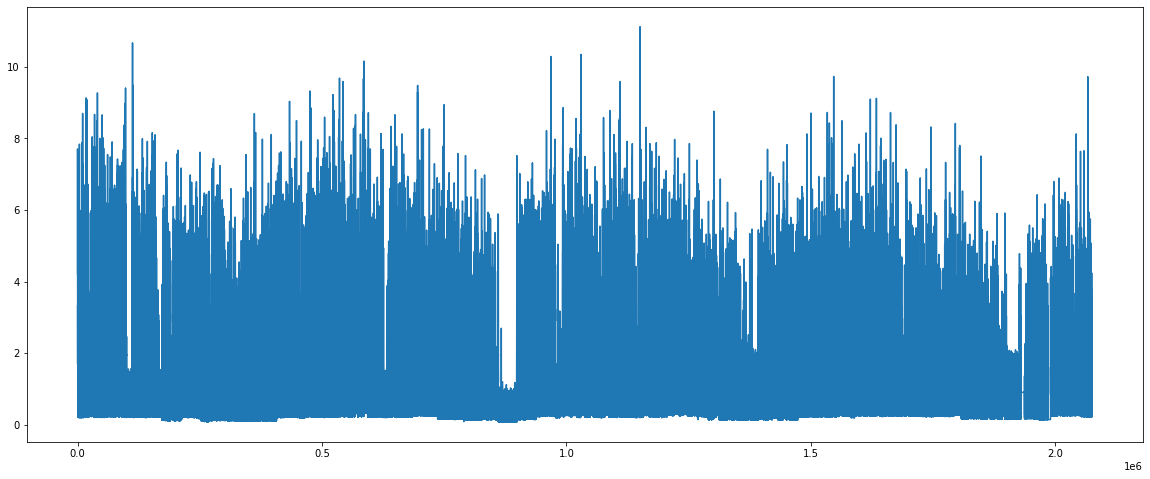

In [10]:
plt.figure(figsize=(20,8))
plt.plot(df.index,df.Global_active_power)


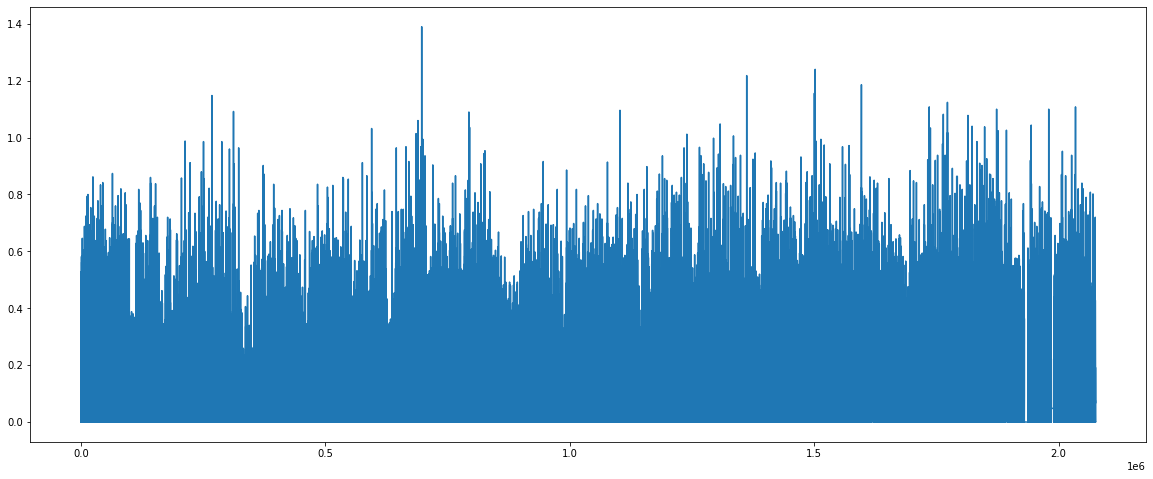

In [11]:
plt.figure(figsize=(20,8))
plt.plot(df.index,df.Global_reactive_power)

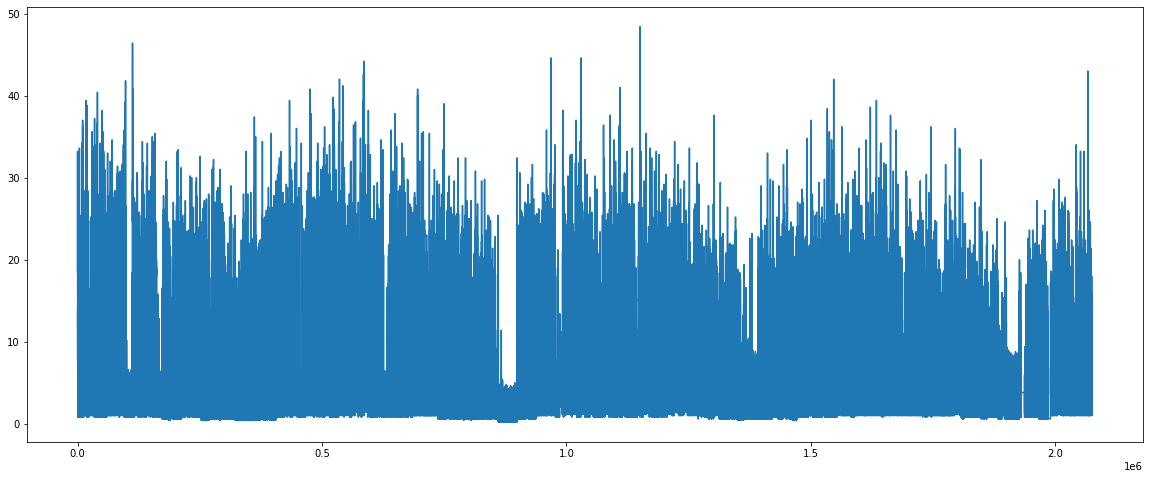

In [12]:
plt.figure(figsize=(20,8))
plt.plot(df.index,df.Global_intensity)


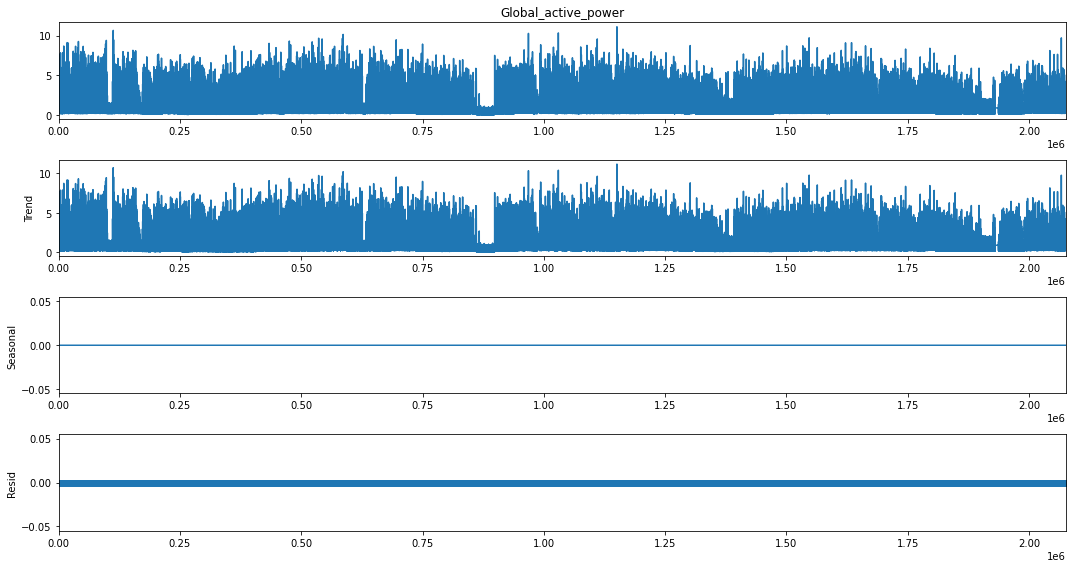

In [13]:
#time series specific explatory methods
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
decompose_Series = sm.tsa.seasonal_decompose(x=df['Global_active_power'], model='additve',extrapolate_trend='freq', period=1)
decompose_Series.plot()
plt.show()